In [1]:
import nltk
#Tokenizers divide strings into lists of substrings. For example, tokenizers can be used to find the words and punctuation in a string:
from nltk.tokenize import sent_tokenize,word_tokenize
from nltk.corpus import stopwords
#Removing the suffix for words like jumping us converted as jumpfrom nltk.stem import PorterStemmer
from nltk import pos_tag
from nltk.corpus import state_union
import re
import string
nltk.download('stopwords')
from nltk.corpus import wordnet
from nltk import pos_tag


[nltk_data] Downloading package stopwords to C:\Users\Shubham
[nltk_data]     Upadhyay\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
#it links words with similar meanings to one word eg. rocks -> rock 
#Stemming is the process of producing morphological variants of a root/base word  eg.  A stemming algorithm reduces the words “chocolates”, “chocolatey”, “choco” to the root word, “chocolate” and “retrieval”, “retrieved”, “retrieves” reduce to the stem “retrieve”.  
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to C:\Users\Shubham
[nltk_data]     Upadhyay\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
tweets=pd.read_csv("train.csv")
tweets_test=pd.read_csv("test.csv")

In [4]:
tweets_test.head()

,tweet_id,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,569682010270101504,American,NaN,zsalim03,NaN,0,@AmericanAir In car gng to DFW. Pulled over 1h...,NaN,2015-02-22 18:15:50 -0800,Texas,Central Time (US & Canada)
1,569608307184242688,American,NaN,sa_craig,NaN,0,"@AmericanAir after all, the plane didn’t land ...",NaN,2015-02-22 13:22:57 -0800,"College Station, TX",Central Time (US & Canada)
2,567879304593408001,Southwest,NaN,DanaChristos,NaN,1,@SouthwestAir can't believe how many paying cu...,NaN,2015-02-17 18:52:31 -0800,CT,Eastern Time (US & Canada)
3,569757651539660801,US Airways,NaN,rossj987,NaN,0,@USAirways I can legitimately say that I would...,NaN,2015-02-22 23:16:24 -0800,"Washington, D.C.",Eastern Time (US & Canada)
4,569900705852608513,American,NaN,tranpham18,NaN,0,@AmericanAir still no response from AA. great ...,NaN,2015-02-23 08:44:51 -0800,New York City,Eastern Time (US & Canada)


In [5]:
tweets.head()

,tweet_id,airline_sentiment,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,567900433542488064,negative,Southwest,NaN,ColeyGirouard,NaN,0,"@SouthwestAir I am scheduled for the morning, ...",NaN,2015-02-17 20:16:29 -0800,Washington D.C.,Atlantic Time (Canada)
1,569989168903819264,positive,Southwest,NaN,WalterFaddoul,NaN,0,@SouthwestAir seeing your workers time in and ...,NaN,2015-02-23 14:36:22 -0800,"Indianapolis, Indiana; USA",Central Time (US & Canada)
2,568089179520954368,positive,United,NaN,LocalKyle,NaN,0,@united Flew ORD to Miami and back and had gr...,NaN,2015-02-18 08:46:29 -0800,Illinois,Central Time (US & Canada)
3,568928195581513728,negative,Southwest,NaN,amccarthy19,NaN,0,@SouthwestAir @dultch97 that's horse radish 😤🐴,NaN,2015-02-20 16:20:26 -0800,NaN,Atlantic Time (Canada)
4,568594180014014464,negative,United,NaN,J_Okayy,NaN,0,@united so our flight into ORD was delayed bec...,NaN,2015-02-19 18:13:11 -0800,NaN,Eastern Time (US & Canada)


In [6]:
mood_count = tweets['airline_sentiment'].value_counts()
mood_count

negative    6851
neutral     2327
positive    1802
Name: airline_sentiment, dtype: int64

In [7]:
tweets['airline'].value_counts()


United            2928
US Airways        2152
American          2078
Southwest         1817
Delta             1639
Virgin America     366
Name: airline, dtype: int64

Text(0, 0.5, 'sentiment count')

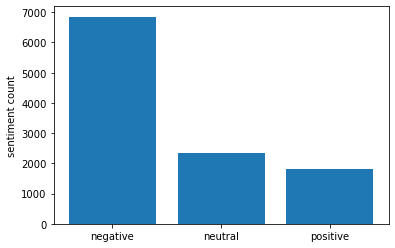

In [8]:
Index = [1, 2, 3]
plt.bar(Index, mood_count)
plt.xticks(Index, ['negative', 'neutral', 'positive'])
plt.ylabel('sentiment count')

In [9]:
united = tweets[tweets['airline'] == 'United']
usairways = tweets[tweets['airline'] == 'US Airways']
american = tweets[tweets['airline'] == 'American']
southwest = tweets[tweets['airline'] == 'Southwest']
delta = tweets[tweets['airline'] == 'Delta']
virgin = tweets[tweets['airline'] == 'Virgin America']

In [10]:
tweets['tokenized_sents'] = tweets.apply(lambda row: nltk.word_tokenize(row['text']), axis=1)
tweets_test['tokenized_sents'] = tweets_test.apply(lambda row: nltk.word_tokenize(row['text']), axis=1)

In [11]:
tweets.head()

,tweet_id,airline_sentiment,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,tokenized_sents
0,567900433542488064,negative,Southwest,NaN,ColeyGirouard,NaN,0,"@SouthwestAir I am scheduled for the morning, ...",NaN,2015-02-17 20:16:29 -0800,Washington D.C.,Atlantic Time (Canada),"[@, SouthwestAir, I, am, scheduled, for, the, ..."
1,569989168903819264,positive,Southwest,NaN,WalterFaddoul,NaN,0,@SouthwestAir seeing your workers time in and ...,NaN,2015-02-23 14:36:22 -0800,"Indianapolis, Indiana; USA",Central Time (US & Canada),"[@, SouthwestAir, seeing, your, workers, time,..."
2,568089179520954368,positive,United,NaN,LocalKyle,NaN,0,@united Flew ORD to Miami and back and had gr...,NaN,2015-02-18 08:46:29 -0800,Illinois,Central Time (US & Canada),"[@, united, Flew, ORD, to, Miami, and, back, a..."
3,568928195581513728,negative,Southwest,NaN,amccarthy19,NaN,0,@SouthwestAir @dultch97 that's horse radish 😤🐴,NaN,2015-02-20 16:20:26 -0800,NaN,Atlantic Time (Canada),"[@, SouthwestAir, @, dultch97, that, 's, horse..."
4,568594180014014464,negative,United,NaN,J_Okayy,NaN,0,@united so our flight into ORD was delayed bec...,NaN,2015-02-19 18:13:11 -0800,NaN,Eastern Time (US & Canada),"[@, united, so, our, flight, into, ORD, was, d..."


In [12]:
documents=list(tweets[['tokenized_sents','airline_sentiment']].itertuples(index=False, name=None))

In [13]:
document_test=list(tweets_test.tokenized_sents)

In [14]:
tweets_test.shape

(3660, 12)

In [15]:
documents

[(['@',
   'SouthwestAir',
   'I',
   'am',
   'scheduled',
   'for',
   'the',
   'morning',
   ',',
   '2',
   'days',
   'after',
   'the',
   'fact',
   ',',
   'yes',
   '..',
   'not',
   'sure',
   'why',
   'my',
   'evening',
   'flight',
   'was',
   'the',
   'only',
   'one',
   'Cancelled',
   'Flightled'],
  'negative'),
 (['@',
   'SouthwestAir',
   'seeing',
   'your',
   'workers',
   'time',
   'in',
   'and',
   'time',
   'out',
   'going',
   'above',
   'and',
   'beyond',
   'is',
   'why',
   'I',
   'love',
   'flying',
   'with',
   'you',
   'guys',
   '.',
   'Thank',
   'you',
   '!'],
  'positive'),
 (['@',
   'united',
   'Flew',
   'ORD',
   'to',
   'Miami',
   'and',
   'back',
   'and',
   'had',
   'great',
   'crew',
   ',',
   'service',
   'on',
   'both',
   'legs',
   '.',
   'THANKS'],
  'positive'),
 (['@',
   'SouthwestAir',
   '@',
   'dultch97',
   'that',
   "'s",
   'horse',
   'radish',
   '😤🐴'],
  'negative'),
 (['@',
   'united',
   's

In [16]:
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()

In [17]:
import random
random.shuffle(documents)
documents[0:5]

[(['@',
   'SouthwestAir',
   '#',
   'DestinationDragons',
   'Any',
   'word',
   'on',
   'winners',
   'of',
   'contest',
   '?',
   'Any',
   'chance',
   'for',
   'tix',
   'for',
   'the',
   'Provo',
   'DestinationDragons',
   'show',
   '?',
   'Fingers',
   'Crossed',
   '!'],
  'neutral'),
 (['@',
   'united',
   'your',
   '``',
   'customer',
   'service',
   "''",
   'team',
   'in',
   'manilla',
   'is',
   'absolute',
   'shit',
   '.',
   'I',
   'ca',
   "n't",
   'even',
   'get',
   'a',
   'supervisor',
   'without',
   'being',
   'out',
   'back',
   'on',
   'hold',
   '?',
   '!'],
  'negative'),
 (['@', 'VirginAmerica', 'Have', 'a', 'great', 'week', '🌞✈'], 'positive'),
 (['@',
   'united',
   'Bag',
   'was',
   'finally',
   'delivered',
   'and',
   'intact',
   '.',
   'Thanks',
   'for',
   'your',
   'assistance',
   '.'],
  'positive'),
 (['@', 'united', 'i', 'need', 'help', 'but', 'in', 'spanish'], 'negative')]

In [18]:
def get_simple_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [19]:
stops=set(stopwords.words('english'))

In [20]:
punctuations=list(string.punctuation)

In [21]:
stops.update(punctuations)

In [22]:
stops,string.punctuation

({'!',
  '"',
  '#',
  '$',
  '%',
  '&',
  "'",
  '(',
  ')',
  '*',
  '+',
  ',',
  '-',
  '.',
  '/',
  ':',
  ';',
  '<',
  '=',
  '>',
  '?',
  '@',
  '[',
  '\\',
  ']',
  '^',
  '_',
  '`',
  'a',
  'about',
  'above',
  'after',
  'again',
  'against',
  'ain',
  'all',
  'am',
  'an',
  'and',
  'any',
  'are',
  'aren',
  "aren't",
  'as',
  'at',
  'be',
  'because',
  'been',
  'before',
  'being',
  'below',
  'between',
  'both',
  'but',
  'by',
  'can',
  'couldn',
  "couldn't",
  'd',
  'did',
  'didn',
  "didn't",
  'do',
  'does',
  'doesn',
  "doesn't",
  'doing',
  'don',
  "don't",
  'down',
  'during',
  'each',
  'few',
  'for',
  'from',
  'further',
  'had',
  'hadn',
  "hadn't",
  'has',
  'hasn',
  "hasn't",
  'have',
  'haven',
  "haven't",
  'having',
  'he',
  'her',
  'here',
  'hers',
  'herself',
  'him',
  'himself',
  'his',
  'how',
  'i',
  'if',
  'in',
  'into',
  'is',
  'isn',
  "isn't",
  'it',
  "it's",
  'its',
  'itself',
  'just',
  'll',


In [23]:
def clean_reviews(words):
    output_words=[]
    for w in words:
        if not w.lower() in stops:
            pos=pos_tag([w])
            clean_word=lemmatizer.lemmatize(w,get_simple_pos(pos[0][1]))
            output_words.append(clean_word.lower())
    return output_words

In [24]:
documents=[(clean_reviews(document),airline_sentiment) for document,airline_sentiment in documents]
#documents

In [25]:
#document_test[1]

In [26]:
document_test=[(clean_reviews(document)) for document in document_test]
#document_test

In [27]:
training_documents=documents
testing_documents=document_test

In [28]:
all_words=[]

In [29]:
for doc in training_documents:
    all_words+=doc[0]

In [30]:
import nltk
freq=nltk.FreqDist(all_words)

In [31]:
common=freq.most_common(3000)

In [32]:
features=[i[0] for i in common]

In [33]:
def get_feature_dict(words):
    current_features={}
    words_set=set(words)
    for w in features:
        current_features[w]=w in words_set
    return current_features

In [34]:
output=get_feature_dict(training_documents[0][0])   
#output

In [35]:
training_data=[(get_feature_dict(doc),category) for doc,category in training_documents]
#training_data[0]

In [36]:
testing_data=[(get_feature_dict(doc)) for doc in testing_documents]
#testing_data

In [37]:
output1=get_feature_dict(document_test[0][0])
output1

{'flight': False,
 'united': False,
 'usairways': False,
 'americanair': False,
 'southwestair': False,
 'jetblue': False,
 'get': False,
 "n't": False,
 "'s": False,
 'http': False,
 'hour': False,
 'thanks': False,
 'cancelled': False,
 'service': False,
 'help': False,
 'customer': False,
 'time': False,
 '...': False,
 'u': False,
 'call': False,
 'bag': False,
 'plane': False,
 'wait': False,
 'go': False,
 'amp': False,
 'need': False,
 'hold': False,
 "'m": False,
 'fly': False,
 'make': False,
 '2': False,
 'thank': False,
 'would': False,
 'still': False,
 'one': False,
 'gate': False,
 'day': False,
 'please': False,
 'ca': False,
 'back': False,
 'delayed': False,
 'try': False,
 'airline': False,
 'take': False,
 'virginamerica': False,
 'flightled': False,
 'say': False,
 'seat': False,
 "'ve": False,
 'delay': False,
 "''": False,
 '``': False,
 'like': False,
 'change': False,
 'phone': False,
 'bad': False,
 'agent': False,
 'late': False,
 'today': False,
 'know': Fals

In [38]:
output=get_feature_dict(training_documents[0][0])   
output

{'flight': False,
 'united': False,
 'usairways': False,
 'americanair': False,
 'southwestair': True,
 'jetblue': False,
 'get': False,
 "n't": False,
 "'s": False,
 'http': False,
 'hour': False,
 'thanks': False,
 'cancelled': False,
 'service': False,
 'help': False,
 'customer': False,
 'time': False,
 '...': False,
 'u': False,
 'call': False,
 'bag': False,
 'plane': False,
 'wait': False,
 'go': False,
 'amp': False,
 'need': False,
 'hold': False,
 "'m": False,
 'fly': False,
 'make': False,
 '2': False,
 'thank': False,
 'would': False,
 'still': False,
 'one': False,
 'gate': False,
 'day': False,
 'please': False,
 'ca': False,
 'back': False,
 'delayed': False,
 'try': False,
 'airline': False,
 'take': False,
 'virginamerica': False,
 'flightled': False,
 'say': False,
 'seat': False,
 "'ve": False,
 'delay': False,
 "''": False,
 '``': False,
 'like': False,
 'change': False,
 'phone': False,
 'bad': False,
 'agent': False,
 'late': False,
 'today': False,
 'know': False

In [39]:
from nltk import NaiveBayesClassifier
Classifier=NaiveBayesClassifier.train(training_data)
length=len(testing_data)
for i in range(0,length):
    print(Classifier.classify(testing_data[i]))

negative
negative
negative
neutral
positive
negative
neutral
negative
negative
negative
negative
negative
neutral
negative
neutral
negative
positive
neutral
negative
negative
positive
neutral
negative
negative
negative
neutral
negative
negative
neutral
positive
negative
negative
negative
negative
negative
negative
negative
negative
negative
negative
positive
negative
negative
positive
negative
negative
negative
negative
neutral
neutral
neutral
negative
negative
positive
negative
negative
negative
positive
positive
negative
negative
negative
negative
negative
positive
positive
positive
negative
neutral
negative
negative
negative
neutral
positive
negative
negative
negative
negative
neutral
neutral
negative
negative
negative
negative
negative
neutral
negative
neutral
negative
positive
negative
neutral
negative
negative
positive
neutral
neutral
positive
neutral
negative
negative
positive
negative
negative
negative
positive
negative
negative
negative
negative
negative
negative
neutral
negat

negative
negative
negative
positive
negative
negative
positive
negative
negative
negative
neutral
positive
negative
negative
negative
negative
negative
negative
positive
neutral
negative
negative
neutral
negative
neutral
neutral
negative
negative
negative
negative
neutral
neutral
neutral
negative
neutral
negative
negative
negative
negative
neutral
negative
negative
negative
positive
positive
negative
negative
negative
negative
negative
negative
negative
negative
negative
negative
negative
negative
negative
neutral
positive
negative
positive
negative
negative
negative
negative
negative
negative
neutral
neutral
neutral
neutral
neutral
negative
negative
neutral
positive
negative
positive
negative
positive
negative
negative
negative
positive
negative
negative
negative
negative
positive
neutral
negative
negative
neutral
neutral
negative
negative
negative
negative
negative
negative
negative
negative
negative
neutral
positive
negative
negative
neutral
negative
negative
negative
negative
neutr

positive
negative
negative
neutral
neutral
negative
neutral
negative
negative
neutral
negative
negative
negative
negative
negative
neutral
positive
negative
negative
negative
negative
negative
positive
negative
negative
negative
negative
positive
positive
positive
negative
positive
neutral
negative
negative
negative
negative
negative
negative
negative
negative
negative
neutral
neutral
negative
negative
negative
negative
neutral
positive
negative
negative
negative
negative
positive
positive
negative
negative
positive
negative
negative
negative
negative
negative
negative
neutral
positive
negative
negative
neutral
positive
negative
negative
negative
negative
negative
positive
negative
negative
negative
negative
neutral
negative
negative
negative
negative
positive
negative
neutral
neutral
positive
positive
positive
positive
negative
positive
neutral
negative
neutral
positive
neutral
negative
negative
neutral
neutral
neutral
negative
negative
negative
neutral
negative
negative
negative
nega

positive
negative
negative
negative
negative
negative
negative
negative
negative
positive
negative
negative
neutral
negative
neutral
negative
negative
neutral
negative
negative
negative
negative
negative
neutral
negative
negative
neutral
negative
neutral
negative
positive
positive
neutral
negative
negative
positive
neutral
neutral
negative
neutral
positive
negative
negative
negative
negative
positive
negative
negative
neutral
positive
negative
negative
negative
negative
negative
negative
neutral
negative
negative
negative
negative
negative
negative
negative
negative
negative
negative
negative
neutral
neutral
negative
negative
negative
negative
negative
neutral
negative
negative
neutral
negative
positive
negative
negative
positive
negative
negative
positive
negative
neutral
positive
neutral
negative
neutral
negative
neutral
positive
positive
negative
positive
neutral
negative
neutral
neutral
neutral
negative
positive
negative
negative
negative
negative
negative
negative
negative
negativ

In [40]:
from sklearn.svm import SVC
from nltk.classify.scikitlearn import SklearnClassifier

In [41]:
svc=SVC()

In [42]:
Classifier_sklearn=SklearnClassifier(svc)

In [43]:
Classifier_sklearn.train(training_data)

<SklearnClassifier(SVC())>

In [44]:
from nltk.classify import SklearnClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC

In [45]:
classif = SklearnClassifier(BernoulliNB()).train(training_data)

In [46]:
pred=classif.classify_many(testing_data)

In [47]:
pred

['negative',
 'negative',
 'negative',
 'neutral',
 'positive',
 'negative',
 'neutral',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'neutral',
 'negative',
 'neutral',
 'negative',
 'positive',
 'neutral',
 'negative',
 'negative',
 'positive',
 'neutral',
 'negative',
 'negative',
 'negative',
 'neutral',
 'negative',
 'negative',
 'neutral',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'positive',
 'negative',
 'negative',
 'positive',
 'negative',
 'negative',
 'negative',
 'negative',
 'neutral',
 'neutral',
 'neutral',
 'negative',
 'negative',
 'positive',
 'negative',
 'negative',
 'negative',
 'positive',
 'positive',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'positive',
 'positive',
 'positive',
 'negative',
 'neutral',
 'negative',
 'negative',
 'negative',
 'neutral',
 'positive',
 'negative',
 'negative',
 'negative',
 'negative',

In [48]:
np.savetxt('twitter.csv', pred  ,fmt = "%s",delimiter=',')